In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [2]:
cohort_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/[M+H]+_hcd_cohort_fingerprints.bin'

In [3]:
dataset=pd.read_pickle(cohort_input_address)

In [4]:
dataset=shuffle(dataset,random_state=1337)
dataset.reset_index(inplace=True)

In [5]:
X=np.array(dataset.fingerprint_array.to_list())

In [6]:
y=np.array(dataset.dot_product.to_list())
y=1-y

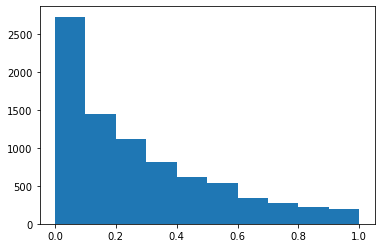

In [7]:
plt.hist(y)
plt.show()

In [8]:
y[y>=0.7]=1
y[y<0.7]=0

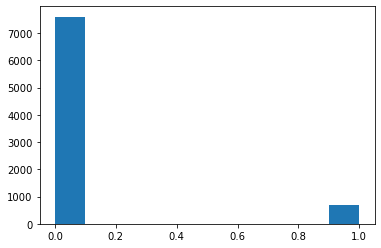

In [9]:
plt.hist(y)
plt.show()

In [10]:
X_train=X[0:int(np.floor(0.8*len(X)))]
y_train=y[0:int(np.floor(0.8*len(y)))]
X_test=X[int(np.floor(0.8*len(X))):]
y_test=y[int(np.floor(0.8*len(y))):]

In [11]:
my_RandomForestClassifier_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_RandomForestClassifier',RandomForestClassifier())
    ]
)
my_RandomForestClassifier_parameters=[
    {
        'my_RandomForestClassifier__n_estimators':[10,20,40,100,200],
        'my_RandomForestClassifier__n_jobs':[4],
        'my_RandomForestClassifier__random_state':[1337]#,
        #'my_RandomForestRegressor__max_depth':[5]
        
    }
]

In [43]:
my_RandomForestClassifier_Gridsearch=GridSearchCV(
    my_RandomForestClassifier_Pipeline,
    my_RandomForestClassifier_parameters,
    cv=5,
    scoring='precision',
    return_train_score=True
)

my_RandomForestClassifier_Gridsearch.fit(X_train,y_train)

my_RandomForestClassifier_Gridsearch_results=my_RandomForestClassifier_Gridsearch.cv_results_
for mean_score, params in zip(my_RandomForestClassifier_Gridsearch_results["mean_test_score"],my_RandomForestClassifier_Gridsearch_results["params"]):
    #print(np.sqrt(-mean_score), params)
    print(mean_score,params)
    
winner_RandomForestClassifier=my_RandomForestClassifier_Gridsearch.best_estimator_

0.4916946383242268 {'my_RandomForestClassifier__n_estimators': 10, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5370872783130849 {'my_RandomForestClassifier__n_estimators': 20, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5362289915966386 {'my_RandomForestClassifier__n_estimators': 40, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5391266975377198 {'my_RandomForestClassifier__n_estimators': 100, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}
0.5294150294150294 {'my_RandomForestClassifier__n_estimators': 200, 'my_RandomForestClassifier__n_jobs': 4, 'my_RandomForestClassifier__random_state': 1337}


In [13]:
print(my_RandomForestClassifier_Gridsearch_results)

{'mean_fit_time': array([0.29696426, 0.20729585, 0.25881953, 0.44448361, 0.73318009]), 'std_fit_time': array([0.23225599, 0.00954466, 0.01032701, 0.02006517, 0.03233989]), 'mean_score_time': array([0.0250411 , 0.03146367, 0.04676266, 0.08764844, 0.16941752]), 'std_score_time': array([0.00304537, 0.00115956, 0.0004692 , 0.00762656, 0.00462094]), 'param_my_RandomForestClassifier__n_estimators': masked_array(data=[10, 20, 40, 100, 200],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_my_RandomForestClassifier__n_jobs': masked_array(data=[4, 4, 4, 4, 4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_my_RandomForestClassifier__random_state': masked_array(data=[1337, 1337, 1337, 1337, 1337],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'my_RandomForestClassifier__n_estimators': 10, 'my_RandomF

In [44]:
y_predict=winner_RandomForestClassifier.predict(X_test)

In [45]:
my_confusion=confusion_matrix(y_test,y_predict)


In [46]:
my_confusion

array([[1488,   14],
       [ 123,   35]])

<AxesSubplot:>

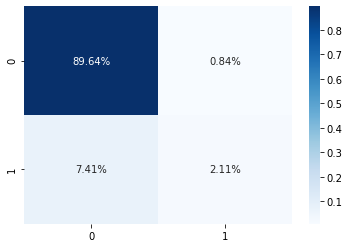

In [47]:
import seaborn as sns
sns.heatmap(my_confusion/np.sum(my_confusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [18]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [19]:
my_BalancedRandomForestClassifier_Pipeline=Pipeline(
    [
        #('my_StandardScaler',StandardScaler()),
        ('my_BalancedRandomForestClassifier',BalancedRandomForestClassifier())
    ]
)
my_BalancedRandomForestClassifier_parameters=[
    {
        'my_BalancedRandomForestClassifier__n_estimators':[10,20,40,100,200],
        'my_BalancedRandomForestClassifier__n_jobs':[5],
        'my_BalancedRandomForestClassifier__random_state':[1337],
        'my_BalancedRandomForestClassifier__criterion':['gini','entropy'],
        'my_BalancedRandomForestClassifier__sampling_strategy':[
            'not majority','not minority','all'
        ],
        'my_BalancedRandomForestClassifier__replacement':[True,False]
        #,
        #'my_BalancedRandomForestRegressor__max_depth':[5]
        
    }
]

In [20]:
my_BalancedRandomForestClassifier_Gridsearch=GridSearchCV(
    my_BalancedRandomForestClassifier_Pipeline,
    my_BalancedRandomForestClassifier_parameters,
    cv=5,
    scoring='precision',
    return_train_score=True
)

my_BalancedRandomForestClassifier_Gridsearch.fit(X_train,y_train)

my_BalancedRandomForestClassifier_Gridsearch_results=my_BalancedRandomForestClassifier_Gridsearch.cv_results_
for mean_score, params in zip(my_BalancedRandomForestClassifier_Gridsearch_results["mean_test_score"],my_BalancedRandomForestClassifier_Gridsearch_results["params"]):
    #print(np.sqrt(-mean_score), params)
    print(mean_score,params)
    
winner_BalancedRandomForestClassifier=my_BalancedRandomForestClassifier_Gridsearch.best_estimator_

0.5388095238095237 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier__replacement': True, 'my_BalancedRandomForestClassifier__sampling_strategy': 'not majority'}
0.17778685765652216 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier__replacement': True, 'my_BalancedRandomForestClassifier__sampling_strategy': 'not minority'}
0.1978318715836876 {'my_BalancedRandomForestClassifier__criterion': 'gini', 'my_BalancedRandomForestClassifier__n_estimators': 10, 'my_BalancedRandomForestClassifier__n_jobs': 5, 'my_BalancedRandomForestClassifier__random_state': 1337, 'my_BalancedRandomForestClassifier_

<AxesSubplot:>

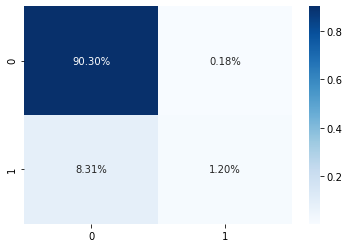

In [21]:
y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(X_test)
my_Balancedconfusion=confusion_matrix(y_test,y_Balancedpredict)
import seaborn as sns
sns.heatmap(my_Balancedconfusion/np.sum(my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

In [22]:
my_BalancedRandomForestClassifier_Gridsearch.best_params_

{'my_BalancedRandomForestClassifier__criterion': 'gini',
 'my_BalancedRandomForestClassifier__n_estimators': 200,
 'my_BalancedRandomForestClassifier__n_jobs': 5,
 'my_BalancedRandomForestClassifier__random_state': 1337,
 'my_BalancedRandomForestClassifier__replacement': True,
 'my_BalancedRandomForestClassifier__sampling_strategy': 'not majority'}

In [23]:
my_BalancedRandomForestClassifier_Gridsearch.best_score_

0.7123792270531402

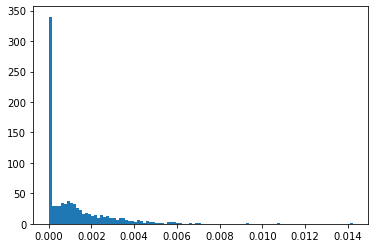

In [24]:
forest=winner_BalancedRandomForestClassifier['my_BalancedRandomForestClassifier']
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [25]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

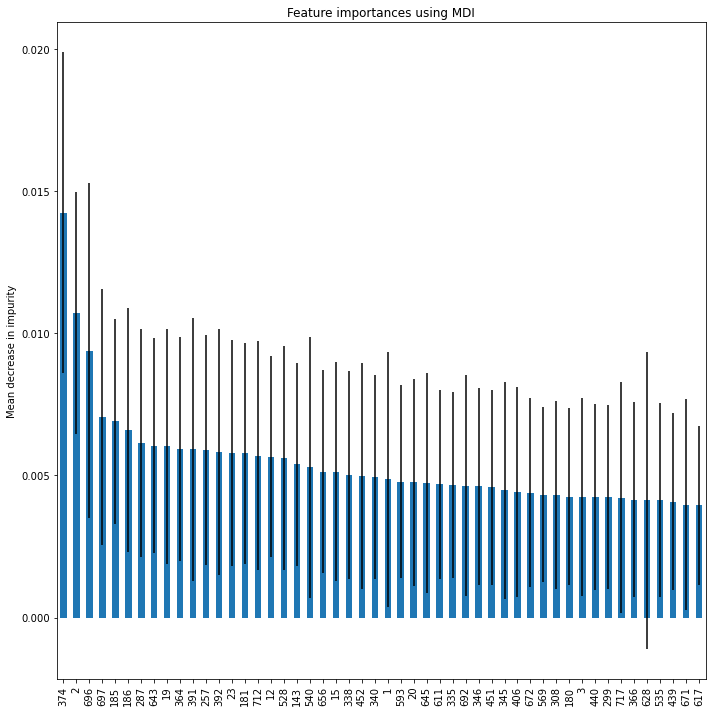

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [27]:
forest_importances.index

Int64Index([374,   2, 696, 697, 185, 186, 287, 643,  19, 364, 391, 257, 392,
             23, 181, 712,  12, 528, 143, 540, 656,  15, 338, 452, 340,   1,
            593,  20, 645, 611, 335, 692, 346, 451, 345, 406, 672, 569, 308,
            180,   3, 440, 299, 717, 366, 628, 535, 439, 671, 617],
           dtype='int64')

KeyboardInterrupt: 

<AxesSubplot:>

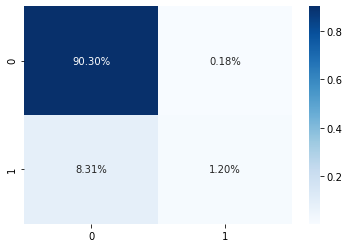

In [30]:
y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(X_test)
my_Balancedconfusion=confusion_matrix(y_test,y_Balancedpredict)
import seaborn as sns
sns.heatmap(my_Balancedconfusion/np.sum(my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')

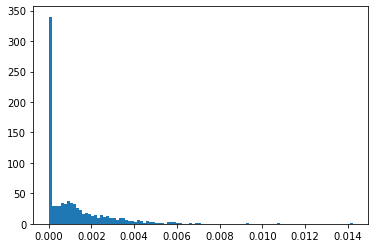

In [31]:
forest=winner_BalancedRandomForestClassifier['my_BalancedRandomForestClassifier']
importances = forest.feature_importances_
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = [i for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(ascending=False,inplace=True)
plt.hist(forest_importances,bins=100)
plt.show()

In [32]:
forest_importances=forest_importances.iloc[0:50]
feature_names=forest_importances.index.to_list()
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
std=std[forest_importances.index]

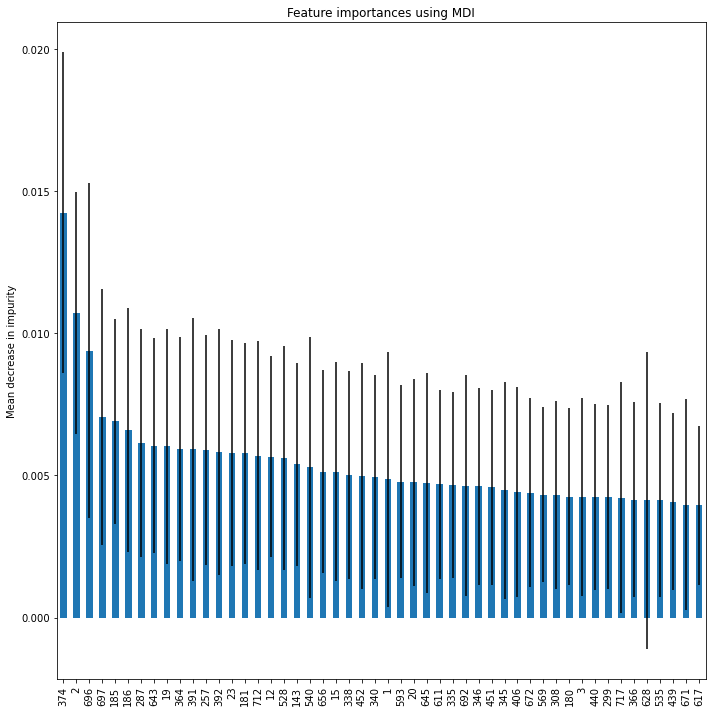

In [33]:
fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [34]:
forest_importances.index

Int64Index([374,   2, 696, 697, 185, 186, 287, 643,  19, 364, 391, 257, 392,
             23, 181, 712,  12, 528, 143, 540, 656,  15, 338, 452, 340,   1,
            593,  20, 645, 611, 335, 692, 346, 451, 345, 406, 672, 569, 308,
            180,   3, 440, 299, 717, 366, 628, 535, 439, 671, 617],
           dtype='int64')

In [35]:
### BEGIN MONA TEST ###

In [36]:
mona_input_address='/home/rictuar/coding_projects/fiehn_work/cfmid/cfmid_redo/results/compound_exploration/mona/[M+H]+_mona_cohort_fingerprints.bin'

In [37]:
mona_dataset=pd.read_pickle(mona_input_address)

In [38]:
mona_X=np.array(mona_dataset.fingerprint_array.to_list())
mona_y=np.array(mona_dataset.dot_product.to_list())
mona_y=1-mona_y

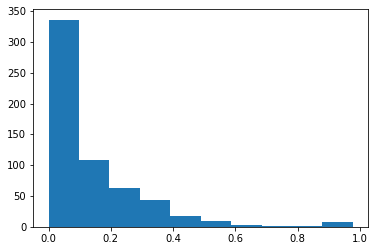

In [39]:
plt.hist(mona_y)
plt.show()

In [40]:
mona_y[mona_y>=0.7]=1
mona_y[mona_y<0.7]=0


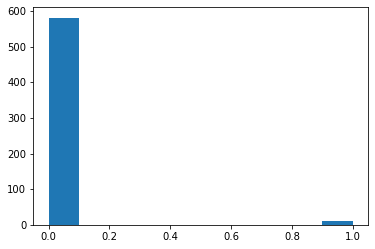

In [41]:
plt.hist(mona_y)
plt.show()

<AxesSubplot:>

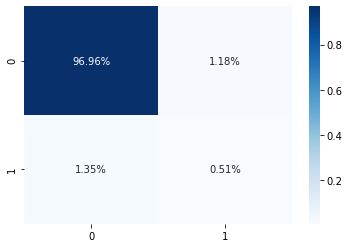

In [42]:
mona_y_Balancedpredict=winner_BalancedRandomForestClassifier.predict(mona_X)
mona_my_Balancedconfusion=confusion_matrix(mona_y,mona_y_Balancedpredict)
sns.heatmap(mona_my_Balancedconfusion/np.sum(mona_my_Balancedconfusion), annot=True, 
            fmt='.2%', cmap='Blues')